<a href="https://colab.research.google.com/github/Advaitkale/Heart-Disease-Prediction/blob/master/HeartDiseasePredictionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.shape

(4238, 16)

In [ ]:
data=data.dropna()
X = data[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes',
      'totChol','sysBP','diaBP','BMI','heartRate','glucose']]
Y = to_categorical(data['TenYearCHD'])


In [ ]:
Y
Y.shape

(3656, 2)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(38, input_dim=X.shape[1], activation='relu',activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(38, activation='sigmoid',activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(38, activation='relu',activity_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.1))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(X_test, Y_test), epochs=1000)

Epoch 1/1000
92/92 [==============================] - 0s 4ms/step - loss: 3.7727 - accuracy: 0.7295 - val_loss: 1.3330 - val_accuracy: 0.8634
Epoch 2/1000
92/92 [==============================] - 0s 2ms/step - loss: 0.8124 - accuracy: 0.8437 - val_loss: 0.5146 - val_accuracy: 0.8634
Epoch 3/1000
92/92 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8437 - val_loss: 0.4206 - val_accuracy: 0.8634
Epoch 4/1000
92/92 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8440 - val_loss: 0.4042 - val_accuracy: 0.8634
Epoch 5/1000
92/92 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8437 - val_loss: 0.3992 - val_accuracy: 0.8634
Epoch 6/1000
92/92 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8434 - val_loss: 0.4035 - val_accuracy: 0.8620
Epoch 7/1000
92/92 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8451 - val_loss: 0.3934 - val_accuracy: 0.8620
Epoch 

In [ ]:
print(model.evaluate(X_test,Y_test))


23/23 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.8552
[0.4613020718097687, 0.8551912307739258]


In [ ]:
y_pred=model.predict_classes([[ 0,	61,	3.0,	1,	30.0	,1.0,	1,	0,	1,	100.0,	150.0,	95.0	,20.58,	65.0,	103.0	]])
y_pred

array([0])

In [ ]:
y_pred1=model.predict([[ 0,	61,	3.0,	1,	30.0	,1.0,	1,	0,	1,	100.0,	150.0,	95.0	,20.58,	65.0,	103.0	]])
y_pred1

array([[0.626552  , 0.37415588]], dtype=float32)

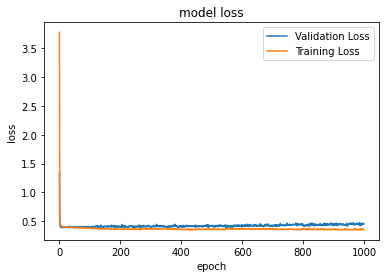

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Validation Loss','Training Loss'])
plt.show()

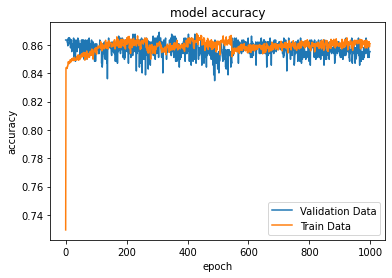

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Validation Data','Train Data'])
plt.show()